In [1]:
import pandas as pd
df1 = pd.read_csv('fhvincome.csv')

In [2]:
def borough(nta):
    n = str(nta)
    if 'BX' in n: return 'Bronx'
    elif 'BK' in n: return 'Brooklyn'
    elif 'QN' in n: return 'Queens'
    elif 'MN' in n: return 'Manhattan'
    elif 'SI' in n: return 'Staten Island'

In [3]:
df1['Borough'] = df1['NTA'].apply(borough)

In [4]:
df1[:5]

,NTA,Taxi Zone,Ride Count,Median Income,Borough
0,BX31,3,163797,69099.0,Bronx
1,SI48,5,17136,96734.0,Staten Island
2,SI14,6,31369,83357.0,Staten Island
3,QN70,7,1002109,61469.0,Queens
4,QN48,9,76735,85282.0,Queens


In [5]:
dataset = df1[['Ride Count', 'Median Income', 'Borough']]
dataset[:5]

,Ride Count,Median Income,Borough
0,163797,69099.0,Bronx
1,17136,96734.0,Staten Island
2,31369,83357.0,Staten Island
3,1002109,61469.0,Queens
4,76735,85282.0,Queens


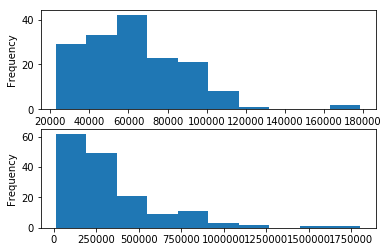

In [16]:
import matplotlib.pyplot as plt
plt.subplot(211)
dataset['Median Income'].plot(kind ='hist')
plt.subplot(212)
dataset['Ride Count'].plot(kind = 'hist')
plt.savefig('FHV-Income Hist.png')

In [17]:
#Testing for normality
from scipy import stats
stats.shapiro(dataset['Ride Count'])

(0.8195386528968811, 9.849962642402565e-13)

In [18]:
stats.shapiro(dataset['Median Income'])

(0.9301915168762207, 5.388856152421795e-07)

In [19]:
#Our data are not normal, let's transform ride count and income using logarithmic transformation
y = dataset['Ride Count'].values
x1 = dataset['Median Income'].values

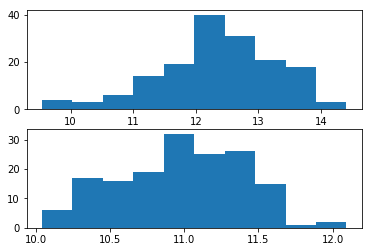

In [20]:
import numpy as np
ylog = np.log(y)
x1log = np.log(x1)
plt.subplot(211)
plt.hist(ylog)
plt.subplot(212)
plt.hist(x1log)
plt.savefig('FHV-Income Hist(log).png')

In [21]:
from scipy import stats
stats.pearsonr(x1log, ylog)

(-0.3662489107454372, 2.056331050029689e-06)

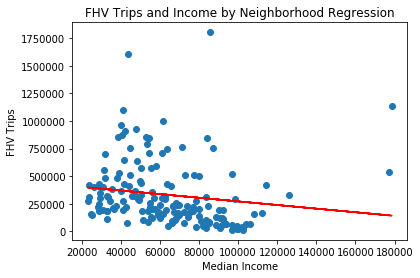

In [23]:
#For comparison, a regression of x1 and y
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x1 = x1.reshape(159,1)
y = y.reshape(159,1)
model.fit(x1, y)
plt.scatter(x1, y)
plt.title("FHV Trips and Income by Neighborhood Regression")
plt.xlabel("Median Income")
plt.ylabel("FHV Trips")
plt.plot(x1, model.predict(x1), color = 'red')
plt.savefig('fhv-income-reg.png')

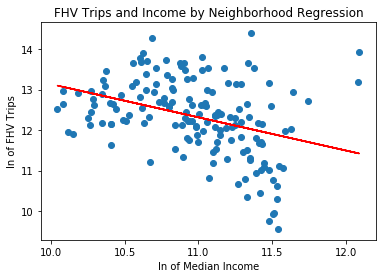

In [24]:
model2 = LinearRegression()
x1log = x1log.reshape(159,1)
ylog = ylog.reshape(159,1)
model2.fit(x1log, ylog)
plt.scatter(x1log, ylog)
plt.title("FHV Trips and Income by Neighborhood Regression")
plt.xlabel("ln of Median Income")
plt.ylabel("ln of FHV Trips")
plt.plot(x1log, model2.predict(x1log), color = 'red')
plt.savefig('fhv-income-reg-log.png')